<a href="https://colab.research.google.com/github/AbhishekParauha/AbhishekParauha/blob/main/moving_average_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files


uploaded = files.upload()



Saving BTC_23_30m.csv to BTC_23_30m (1).csv


<ipython-input-35-c5758da3f961>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, -1)


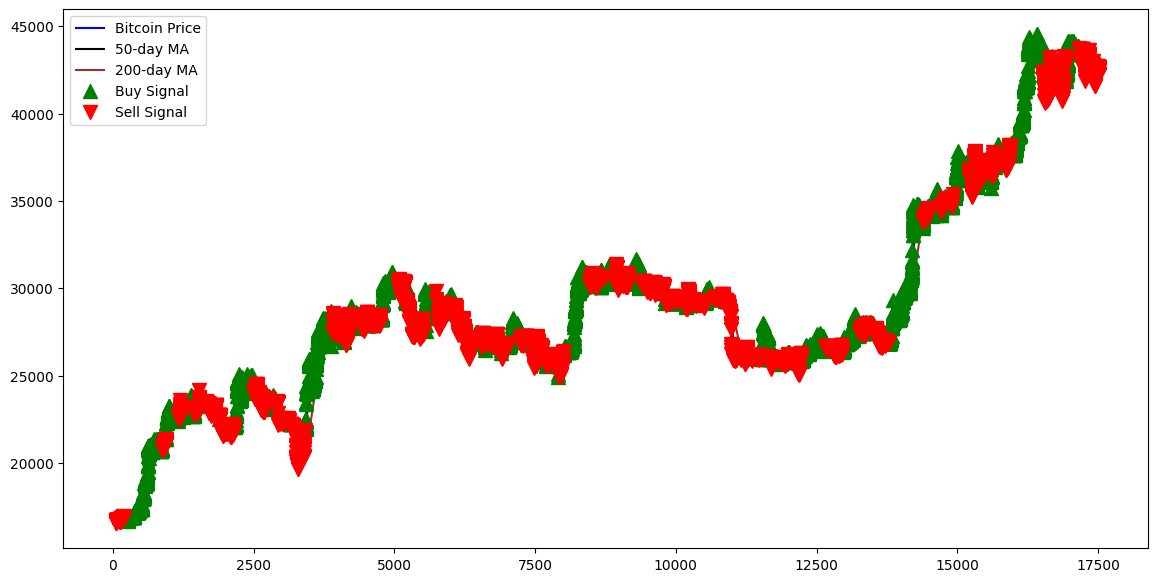

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Bitcoin price data
data = pd.read_csv('BTC_23_30m.csv')

# Calculate 50-period and 200-period moving averages
data['MA50'] = data['close'].rolling(window=50).mean()
data['MA200'] = data['close'].rolling(window=200).mean()

# Generate buy/sell signals based on crossover
data['position'] = 0
data['position'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, -1)

# Calculate daily returns based on position changes
data['returns'] = data['close'].pct_change()
data['strategy_returns'] = data['position'].shift(1) * data['returns']

# Plotting the strategy
plt.figure(figsize=(14,7))
plt.plot(data['close'], color='blue', label='Bitcoin Price')
plt.plot(data['MA50'], color='black', label='50-day MA')
plt.plot(data['MA200'], color='brown', label='200-day MA')
plt.plot(data[data['position'] == 1].index, data['close'][data['position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['position'] == -1].index, data['close'][data['position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.legend()
plt.show()



In [37]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('BTC_23_30m.csv')

# Calculate 20-period and 50-period simple moving averages
data['SMA20'] = data['close'].rolling(window=20).mean()
data['SMA50'] = data['close'].rolling(window=50).mean()

# Create a new column for signals
data['signals'] = 0  # 0 for no signal, 1 for buy, -1 for sell

# Generate buy signals (SMA20 crosses above SMA50)
data.loc[data['SMA20'] > data['SMA50'], 'signals'] = 1

# Generate sell signals (SMA20 crosses below SMA50)
data.loc[data['SMA20'] < data['SMA50'], 'signals'] = -1

# Print the updated DataFrame with buy and sell signals
print(data)


       Unnamed: 0             datetime      open      high       low  \
0               0  2023-01-01 05:30:00  16541.77  16545.70  16517.72   
1               1  2023-01-01 06:00:00  16544.19  16544.61  16508.39   
2               2  2023-01-01 06:30:00  16529.59  16541.80  16525.78   
3               3  2023-01-01 07:00:00  16534.02  16556.80  16530.62   
4               4  2023-01-01 07:30:00  16551.47  16555.00  16539.57   
...           ...                  ...       ...       ...       ...   
17514       17514  2024-01-01 03:30:00  42520.73  42575.16  42426.83   
17515       17515  2024-01-01 04:00:00  42573.49  42591.10  42056.00   
17516       17516  2024-01-01 04:30:00  42257.89  42345.65  42066.00   
17517       17517  2024-01-01 05:00:00  42181.81  42283.59  42154.34   
17518       17518  2024-01-01 05:30:00  42283.58  42554.57  42261.02   

          close      volume       SMA20       SMA50  signals  
0      16544.19  2275.16723         NaN         NaN        0  
1      16

In [38]:
import pandas as pd
from datetime import datetime

# Load the data
data = pd.read_csv('BTC_23_30m.csv')

# Calculate the SMA20 and SMA50
data['SMA20'] = data['close'].rolling(20).mean()
data['SMA50'] = data['close'].rolling(50).mean()

# Initialize signals column to 0
data['signals'] = 0




In [39]:
# Generate buy signals
data.loc[(data['SMA20'] > data['SMA50']) & (data['signals'].shift(1) != 1), 'signals'] = 1



In [40]:
# Generate sell signals
data.loc[(data['SMA20'] < data['SMA50']) & (data['signals'].shift(1) != -1), 'signals'] = -1




In [43]:
# Print the results
print(data[[ 'datetime','signals', 'open', 'high','low','close']])
data.to_csv('output_file.csv', index=False)

                  datetime  signals      open      high       low     close
0      2023-01-01 05:30:00        0  16541.77  16545.70  16517.72  16544.19
1      2023-01-01 06:00:00        0  16544.19  16544.61  16508.39  16529.67
2      2023-01-01 06:30:00        0  16529.59  16541.80  16525.78  16534.60
3      2023-01-01 07:00:00        0  16534.02  16556.80  16530.62  16551.47
4      2023-01-01 07:30:00        0  16551.47  16555.00  16539.57  16552.89
...                    ...      ...       ...       ...       ...       ...
17514  2024-01-01 03:30:00        0  42520.73  42575.16  42426.83  42573.50
17515  2024-01-01 04:00:00        0  42573.49  42591.10  42056.00  42257.88
17516  2024-01-01 04:30:00        0  42257.89  42345.65  42066.00  42181.80
17517  2024-01-01 05:00:00        0  42181.81  42283.59  42154.34  42283.58
17518  2024-01-01 05:30:00        0  42283.58  42554.57  42261.02  42419.73

[17519 rows x 6 columns]


In [44]:
data = pd.read_csv("output_file.csv")

# Replace consecutive 1s or -1s with 0
data['signals'] = data['signals'].mask((data['signals'].shift() == 1) & (data['signals'] == 1), 0)
data['signals'] = data['signals'].mask((data['signals'].shift() == -1) & (data['signals'] == -1), 0)

# Save the modified data back to a new CSV file
data.to_csv("output_file_modified.csv", index=False)